# Running molecular dynamics with CP2K in extended tight-binding framework

In this tutorial for molecular dynamics calculations using extended tight-binding (xTB). The monolayer $C_3N_4$ unit cell is considered. VESTA is used to build the molecular structure model. The VASP file for this stucutre is previously obtianed. Now, in order to use this file in CP2K, we will need to generate an `.xyz` file from this file and also insert the correct cell size in the input file. The `libra_py.data_conv.vasp_to_xyz` function will do it for us and prints out the cell A, B, and C vectors.


<div>
<img src="./C3N4_1x1.JPG" width="1000"/>
</div>

## Table of contents
<a name="toc"></a>
1. [Importing needed libraries](#import)


2. [Overview of required files](#required_files)


3. [Generating the coordinates](#gen_xyz)


4. [Run CP2K](#run_cp2k)


5. [Plot properties](#plot_properties)

### A. Learning objectives

* To be able to prepare the `.xyz` coordinates for CP2K from POSCAR files
* To be able to run molecualr dynamics with CP2K
* To be able to plot the time-dependent properties using `.ener` files

### B. Use cases

* [Generating the coordinates](#gen_xyz)


* [Running molecular dynamics with CP2K](#run_cp2k)


* [Plotting tim-dependent properties from `.ener` files](#plot_properties)

### C. Functions

- `libra_py`
  - `data_conv`
    -  [`vasp_to_xyz`](#gen_xyz)


## 1. Importing needed libraries <a name="import"></a>
[Back to TOC](#toc)

Import `numpy` and `matplotlib` and load `data_conv` using the following commands:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from libra_py import data_conv

/projects/academic/alexeyak/mohammad/software/miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/projects/academic/alexeyak/mohammad/software/miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/projects/academic/alexeyak/mohammad/software/miniconda3/envs/libra/lib/python3.6/import

## 2. Overview of required files <a name="required_files"></a>
[Back to TOC](#toc)

The following file is needed to generate the coordinates in `.xyz` file:

* `C3N4_1x1.vasp`

This file is actually the VASP POSCAR file generated from VESTA and has the Cartesian coordiantes.

* `md.inp`

The CP2K molecular dynamics input file. 

* `submit.slm`

A file for submitting the calculations on a node. This file loads all the necessary libraries for running CP2K calculations.

## 3. Generating the coordinates <a name="gen_xyz"></a>
[Back to TOC](#toc)

The coordiantes are tranformed into `.xyz` by running the follwoing command.

In [2]:
data_conv.vasp_to_xyz('C3N4_1x1.vasp')

[24, 32] ['C', 'N']
A        14.2415132523         0.0000000000         0.0000000000

B         0.0002151559        12.3343009930         0.0000000000

C         0.0018975023         0.0028002808        14.9999996186



Now, `C3N4_1x1.xyz` contains the coordinates in `.xyz` format and copy and paste the printed cell vectors into CP2K input file - the `md.inp` file.

## 4. Run CP2K <a name="run_cp2k"></a>
[Back to TOC](#toc)

To run CP2K, you need to load all the necessary libraries used to compile it. More information on how to run CP2K and the inputs can be found in [here](https://github.com/compchem-cybertraining/Tutorials_CP2K).

If you want to submit the calculations on a node, you will need to submit your job using the provided slurm file. This is done by `sbatch submit.slm`. If you want to run the calculations on your local terminal what you need to do is to run the following commands.

To run the MD for a structure using xTB, one needs to run the SCF calculations using the OT method. Experimentally, this method looks more stable for both `ATOMIC` and `RESTART` guess while diagonalization fails when using `ATOMIC` guess for some systems. The reason for this is not clear but in order to make the diagonalization work, one needs to provide a good guess, which can be a converged wavefunction from OT. This will be used in the step2 and to obtain a trajectory, we can only use the OT method.

$\textbf{Note:}$ This step might take some time to complete. We set the calculations for MD with 200 steps here. To reduce the number of steps you can change the `&MOTION->&MD->STEPS` for shorter MD in the input file. Also, if you use a cluster and you are running the Jupyter notebook, your calculations may be terminated in a couple of minutes. So, it is always better to submit a job if you access to a cluster by `sbatch submit.slm`. For example, as you can see below, we use 16 number of processors and it takes about 1 second per step. The timing data is shown in the `*.ener` file.

In [3]:
! module load intel/20.2
! module load intel-mpi/2020.2
! mpirun -np 16 /projects/academic/cyberwksp21/Software/cp2k-intel/cp2k-8.2/exe/Linux-x86-64-intelx/cp2k.psmp -i md.inp -o out_md_c3n4_1x1_xtb.log
! echo "Done!"

 The Intel 20.2 compilers are in your path. This is adequate for compiling and
running most codes. Source compilervars.sh for more features including the
debugger. 
 The Intel MPI 2020.2 is in your path. This is adequate for compiling and
running most codes. Run "source
/util/academic/intel/20.2/compilers_and_libraries_2020.2.254/linux/mpi/intel64/bin/mpivars.sh"
for more features including the debugger. 
Done!


## 5. Plot properties <a name="plot_properties"></a>
[Back to TOC](#toc)

You can start plotting some time-dependent results including the temperature vs time. This is done by using the `.ener` file.
You can also plot some other time-depedent properties as well to properly check the equilibrium of your system including total energy vs time etc.

<IPython.core.display.Javascript object>


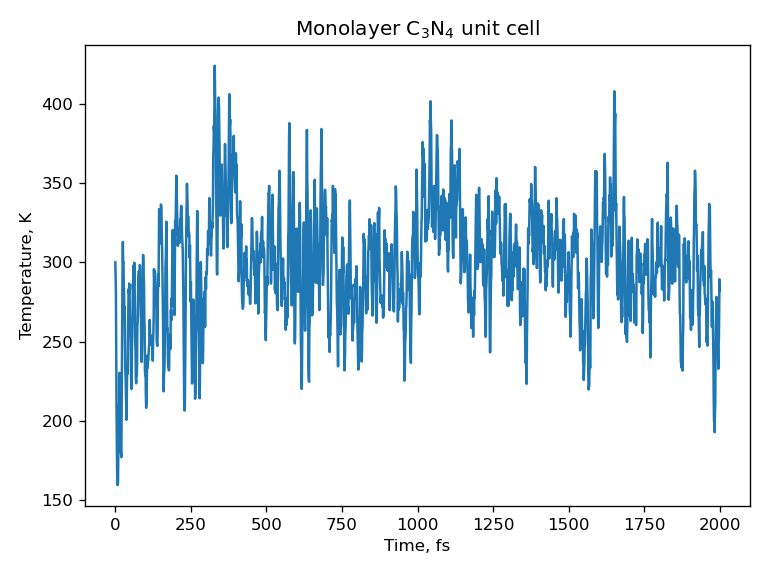

In [2]:
%matplotlib notebook
data = np.loadtxt('c3n4_1x1_MD_xTB-1.ener')
plt.plot(data[:,1],data[:,3])
plt.xlabel('Time, fs')
plt.ylabel('Temperature, K')
plt.title('Monolayer C$_3$N$_4$ unit cell')
plt.tight_layout()